# Multiple Linear Regression

Use of more than one feature variable:
$Y_i = Bias_0 + Weight_1 Feature_1 + Weight_2 Feature_2 + \ldots + Weight_p Feature_p$

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
movies = pd.read_csv("Resources/imdb_final.csv")
movies = movies[["year","genre","duration","director","budget","rating_class","median_vote"]]
movies.head()

,year,genre,duration,director,budget,rating_class,median_vote
0,2001,Comedy,118,James Mangold,48000000,Good,7.0
1,2000,Musical,86,Michael Ritchie,10000000,Good,6.0
2,2001,Drama,104,Vondie Curtis-Hall,22000000,Bad,1.0
3,2001,Comedy,100,Jeremy Kasten,1000000,Good,5.0
4,2000,Crime,87,Bryan Johnson,120000,Good,6.0


### Identify if there is a linear relationship between any of the variables

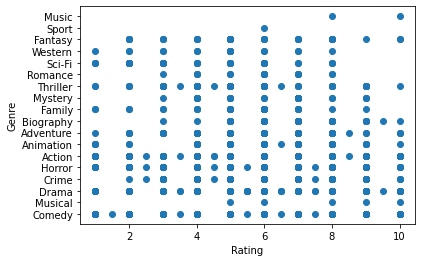

In [3]:
plt.scatter(movies["median_vote"],movies["genre"])
plt.xlabel('Rating')
plt.ylabel('Genre')
plt.show()

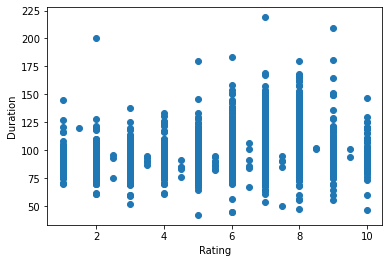

In [4]:
plt.scatter(movies["median_vote"],movies["duration"])
plt.xlabel('Rating')
plt.ylabel('Duration')
plt.show()

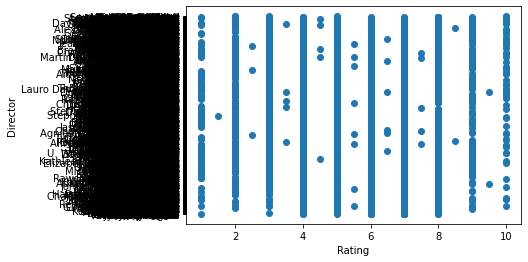

In [5]:
plt.scatter(movies["median_vote"],movies["director"])
plt.xlabel('Rating')
plt.ylabel('Director')
plt.show()

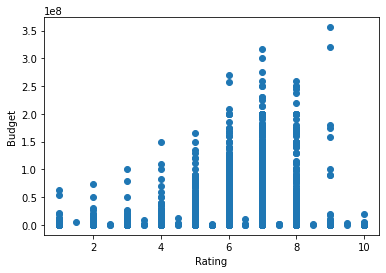

In [6]:
plt.scatter(movies["median_vote"],movies["budget"])
plt.xlabel('Rating')
plt.ylabel('Budget')
plt.show()

### There is not a linear relationship between the independent variables and the dependent variable, therefore the multiple linear regression will not function as intended.

In [7]:
movies.replace("Bad",0, inplace=True)
movies.replace("Good",1, inplace=True)
movies.replace("Excellent",2, inplace=True)
movies.tail()

,year,genre,duration,director,budget,rating_class,median_vote
5055,2019,Comedy,84,Jon Lucas,5000000,2,8.0
5056,2019,Drama,94,Dan Sallitt,95000,1,7.0
5057,2019,Action,84,Glenn Miller,100000,0,3.0
5058,2019,Action,92,Keoni Waxman,3000000,1,5.0
5059,2019,Horror,77,Robin Entreinger,500000,0,2.0


### Shape the data

In [8]:
X = movies[["year","genre","duration","director","budget"]]
y = movies["median_vote"].values.reshape(-1,1)
print(X.shape, y.shape)

(5060, 5) (5060, 1)


In [9]:
data = X.copy()
data

,year,genre,duration,director,budget
0,2001,Comedy,118,James Mangold,48000000
1,2000,Musical,86,Michael Ritchie,10000000
2,2001,Drama,104,Vondie Curtis-Hall,22000000
3,2001,Comedy,100,Jeremy Kasten,1000000
4,2000,Crime,87,Bryan Johnson,120000
...,...,...,...,...,...
5055,2019,Comedy,84,Jon Lucas,5000000
5056,2019,Drama,94,Dan Sallitt,95000
5057,2019,Action,84,Glenn Miller,100000
5058,2019,Action,92,Keoni Waxman,3000000


### Preprocessing Data and Scaling
- Dummy encoding of data to translate it from categorical to numerical.
- Encode the data using pandas get_dummies
- Split the data into traing and test data using train_test_split
- Scale the model

In [10]:
data_binary_encoded = pd.get_dummies(data, columns= ["genre", "director"])
data_binary_encoded.head()

,year,duration,budget,genre_Action,genre_Adventure,genre_Animation,genre_Biography,genre_Comedy,genre_Crime,genre_Drama,...,director_Zack Snyder,director_Zackary Adler,director_Zak Knutson,director_Zak Penn,director_Zebediah De Soto,director_Zia Mojabi,director_Ziad H. Hamzeh,director_Zoe Quist,director_Zoran Lisinac,director_mink
0,2001,118,48000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2000,86,10000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,104,22000000,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,2001,100,1000000,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000,87,120000,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(data_binary_encoded, y, random_state=42)

In [12]:
# Create StandardScaler model and fit to training data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

# Transform training and testing data using X_scaler and y_scaler
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)
y_train = y_scaler.transform(y_train)
y_test = y_scaler.transform(y_test)

### Create model using Linear Regression
- Fit the model to the training data and calculate the scores for the training and testing data
- Review metrics (MSE and R2) of model

In [13]:
model = LinearRegression()

In [14]:
model.fit(X_train, y_train)

training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

predictions = model.predict(X_test)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

Training Score: -0.4908350817667566
Testing Score: -3.7243927959776004e+26
MSE: 3.556943332212233e+26, R2: -3.7243927959776004e+26


### Plot the residuals for the training and testing data

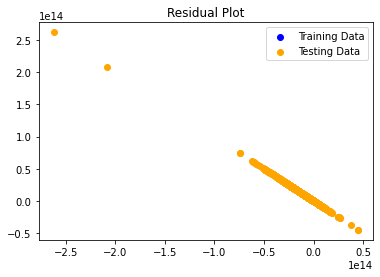

In [15]:
plt.scatter(model.predict(X_train), y_train - model.predict(X_train), c="blue", label="Training Data")
plt.scatter(model.predict(X_test), y_test - model.predict(X_test), c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()
